In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

class TwoLayerMLP:
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))
        self.activation = activation
        
    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        if self.activation == 'relu':
            self.a1 = relu(self.z1)
        else:
            self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = 1 / (1 + np.exp(-self.z2))  # sigmoid for output layer
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        y = y.reshape(-1, 1)
        
        dz2 = self.a2 - y
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        if self.activation == 'relu':
            dz1 = np.dot(dz2, self.weights2.T) * relu_derivative(self.z1)
        else:
            dz1 = np.dot(dz2, self.weights2.T) * tanh_derivative(self.z1)
        
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1

class ThreeLayerMLP:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, activation='relu'):
        self.weights1 = np.random.randn(input_size, hidden1_size) * 0.01
        self.bias1 = np.zeros((1, hidden1_size))
        self.weights2 = np.random.randn(hidden1_size, hidden2_size) * 0.01
        self.bias2 = np.zeros((1, hidden2_size))
        self.weights3 = np.random.randn(hidden2_size, output_size) * 0.01
        self.bias3 = np.zeros((1, output_size))
        self.activation = activation
        
    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        if self.activation == 'relu':
            self.a1 = relu(self.z1)
        else:
            self.a1 = tanh(self.z1)
            
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        if self.activation == 'relu':
            self.a2 = relu(self.z2)
        else:
            self.a2 = tanh(self.z2)
            
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = 1 / (1 + np.exp(-self.z3))
        return self.a3
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        y = y.reshape(-1, 1)
        
        dz3 = self.a3 - y
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        if self.activation == 'relu':
            dz2 = np.dot(dz3, self.weights3.T) * relu_derivative(self.z2)
        else:
            dz2 = np.dot(dz3, self.weights3.T) * tanh_derivative(self.z2)
            
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        if self.activation == 'relu':
            dz1 = np.dot(dz2, self.weights2.T) * relu_derivative(self.z1)
        else:
            dz1 = np.dot(dz2, self.weights2.T) * tanh_derivative(self.z1)
            
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        self.weights3 -= learning_rate * dw3
        self.bias3 -= learning_rate * db3
        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

class TwoLayerMLP_PyTorch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

class ThreeLayerMLP_PyTorch(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, activation='relu'):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden1_size)
        self.layer2 = nn.Linear(hidden1_size, hidden2_size)
        self.layer3 = nn.Linear(hidden2_size, output_size)
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

Training NumPy Models:

Training 2-layer-relu
Epoch 0: Train Acc = 0.4344, Val Acc = 0.4182, Loss = 0.6931
Early stopping at epoch 61

Training 2-layer-tanh
Epoch 0: Train Acc = 0.6055, Val Acc = 0.5227, Loss = 0.6927
Early stopping at epoch 34

Training 3-layer-relu
Epoch 0: Train Acc = 0.4857, Val Acc = 0.6182, Loss = 0.6931
Early stopping at epoch 21

Training 3-layer-tanh
Epoch 0: Train Acc = 0.6408, Val Acc = 0.6455, Loss = 0.6931
Early stopping at epoch 24

Training PyTorch Models:

Training 2-layer-relu
Epoch 0: Train Acc = 0.5724, Val Acc = 0.6136, Loss = 0.6664
Epoch 100: Train Acc = 0.9293, Val Acc = 0.9045, Loss = 0.3264
Early stopping at epoch 199

Training 2-layer-tanh
Epoch 0: Train Acc = 0.6442, Val Acc = 0.6682, Loss = 0.6209
Epoch 100: Train Acc = 0.9498, Val Acc = 0.9318, Loss = 0.2561
Early stopping at epoch 166

Training 3-layer-relu
Epoch 0: Train Acc = 0.3387, Val Acc = 0.4455, Loss = 0.7026
Epoch 100: Train Acc = 0.9795, Val Acc = 0.9727, Loss = 0.0801
Early stop

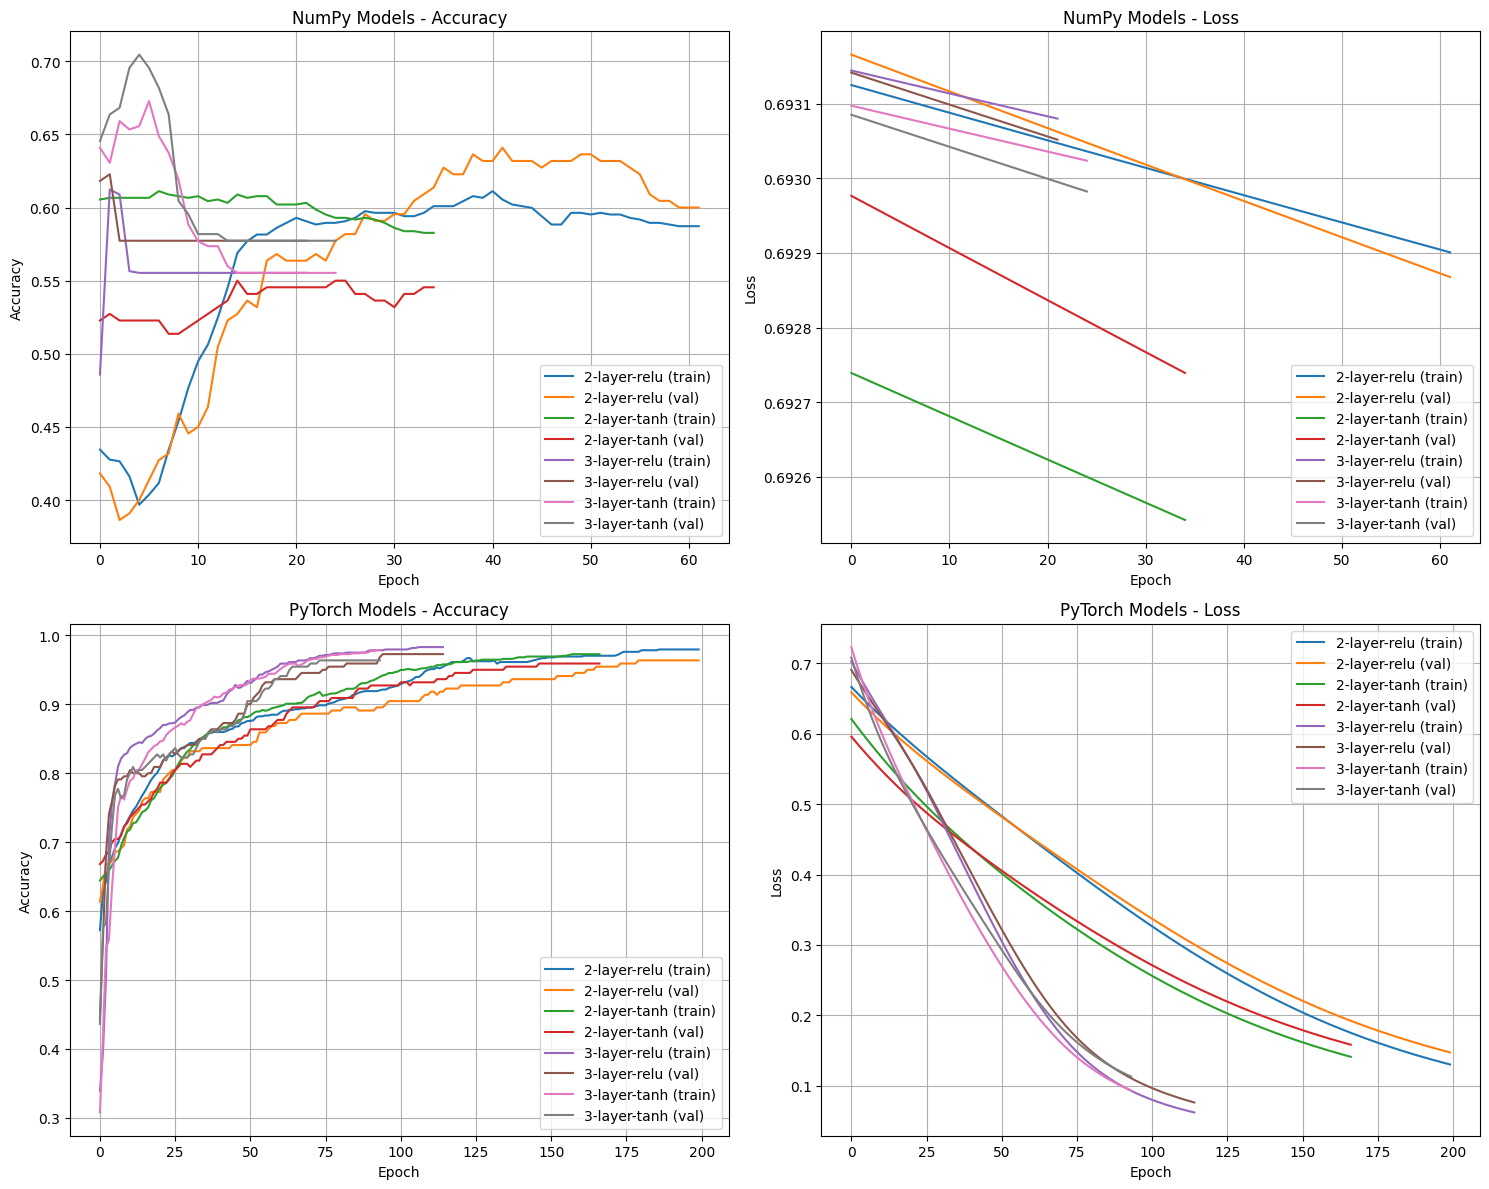

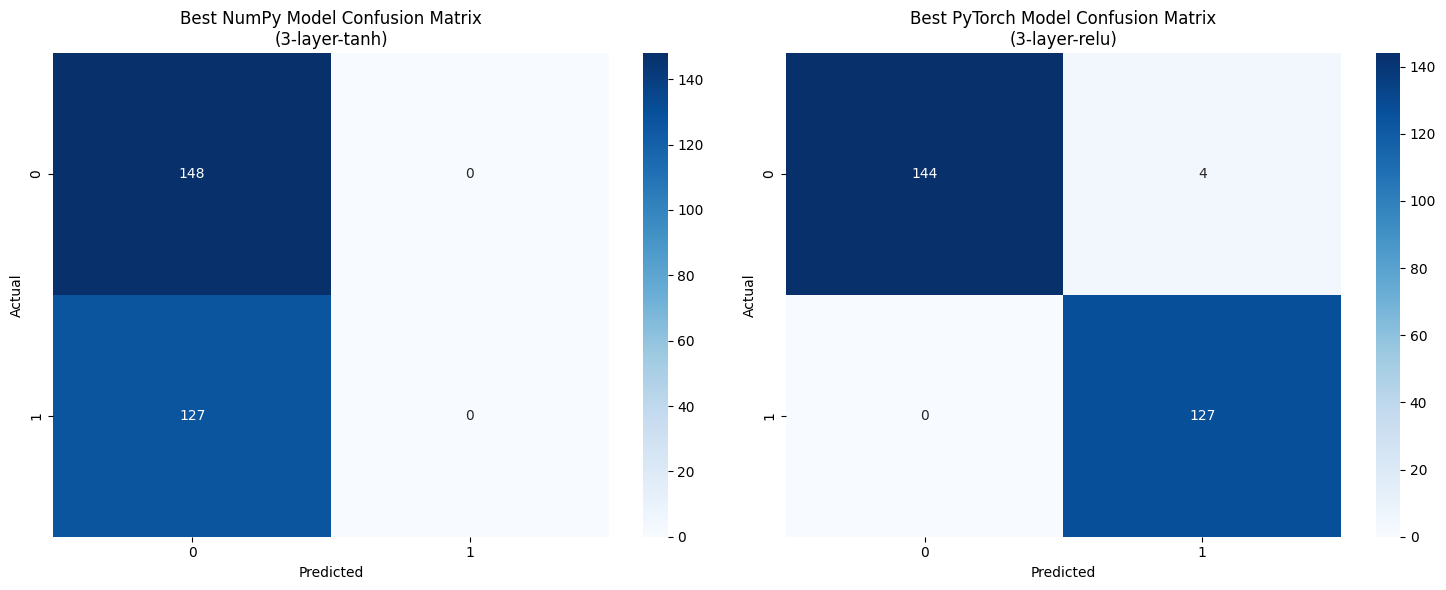


Classification Report - Best NumPy Model (3-layer-tanh):
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       148
           1       1.00      0.00      0.00       127

    accuracy                           0.54       275
   macro avg       0.77      0.50      0.35       275
weighted avg       0.75      0.54      0.38       275


Classification Report - Best PyTorch Model (3-layer-relu):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       148
           1       0.97      1.00      0.98       127

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [49]:
# Data Loading and Model Training Cell
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load and prepare data
data = pd.read_csv('BankNote_Authentication.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def train_numpy_model(model, X_train, y_train, X_val, y_val, max_epochs=1000):
    history = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []}
    best_val_acc = 0
    epochs_without_improvement = 0
    
    # Reshape y to match model output
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    
    for epoch in range(max_epochs):
        # Training
        train_pred = model.forward(X_train)
        train_loss = -np.mean(y_train * np.log(train_pred + 1e-7) + (1 - y_train) * np.log(1 - train_pred + 1e-7))
        model.backward(X_train, y_train, learning_rate=0.001)
        
        # Validation
        with np.errstate(divide='ignore', invalid='ignore'):
            val_pred = model.forward(X_val)
            val_loss = -np.mean(y_val * np.log(val_pred + 1e-7) + (1 - y_val) * np.log(1 - val_pred + 1e-7))
        
        # Calculate accuracies
        train_accuracy = np.mean((train_pred > 0.5).astype(int).flatten() == y_train.flatten())
        val_accuracy = np.mean((val_pred > 0.5).astype(int).flatten() == y_val.flatten())
        
        # Store metrics
        history['train_acc'].append(train_accuracy)
        history['val_acc'].append(val_accuracy)
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Train Acc = {train_accuracy:.4f}, Val Acc = {val_accuracy:.4f}, Loss = {train_loss:.4f}')
        
        # Early stopping with better condition
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            epochs_without_improvement = 0
            best_weights = [np.copy(w) for w in [model.weights1, model.bias1, model.weights2, model.bias2]]
        else:
            epochs_without_improvement += 1
            
        if epochs_without_improvement >= 20:
            print(f'Early stopping at epoch {epoch}')
            # Restore best weights
            model.weights1, model.bias1, model.weights2, model.bias2 = best_weights
            break
            
    return model, history, best_val_acc

def train_pytorch_model(model, X_train, y_train, X_val, y_val, max_epochs=1000):
    history = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []}
    best_val_acc = 0
    epochs_without_improvement = 0
    
    X_train = torch.FloatTensor(X_train)
    y_train = torch.FloatTensor(y_train).reshape(-1, 1)
    X_val = torch.FloatTensor(X_val)
    y_val = torch.FloatTensor(y_val).reshape(-1, 1)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    best_state = None
    
    for epoch in range(max_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_outputs = model(X_train)
        loss = criterion(train_outputs, y_train)
        loss.backward()
        optimizer.step()
        
        # Evaluation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            
            train_pred = (train_outputs > 0.5).float()
            train_accuracy = (train_pred == y_train).float().mean().item()
            
            val_pred = (val_outputs > 0.5).float()
            val_accuracy = (val_pred == y_val).float().mean().item()
        
        # Store metrics
        history['train_acc'].append(train_accuracy)
        history['val_acc'].append(val_accuracy)
        history['train_loss'].append(loss.item())
        history['val_loss'].append(val_loss.item())
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Train Acc = {train_accuracy:.4f}, Val Acc = {val_accuracy:.4f}, Loss = {loss.item():.4f}')
        
        # Early stopping with state saving
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            epochs_without_improvement = 0
            best_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1
            
        if epochs_without_improvement >= 20:
            print(f'Early stopping at epoch {epoch}')
            model.load_state_dict(best_state)
            break
    
    return model, history, best_val_acc

# Train all model variants
models_numpy = {
    '2-layer-relu': TwoLayerMLP(X_train_scaled.shape[1], 64, 1, activation='relu'),
    '2-layer-tanh': TwoLayerMLP(X_train_scaled.shape[1], 64, 1, activation='tanh'),
    '3-layer-relu': ThreeLayerMLP(X_train_scaled.shape[1], 64, 32, 1, activation='relu'),
    '3-layer-tanh': ThreeLayerMLP(X_train_scaled.shape[1], 64, 32, 1, activation='tanh')
}

models_pytorch = {
    '2-layer-relu': TwoLayerMLP_PyTorch(X_train_scaled.shape[1], 64, 1, activation='relu'),
    '2-layer-tanh': TwoLayerMLP_PyTorch(X_train_scaled.shape[1], 64, 1, activation='tanh'),
    '3-layer-relu': ThreeLayerMLP_PyTorch(X_train_scaled.shape[1], 64, 32, 1, activation='relu'),
    '3-layer-tanh': ThreeLayerMLP_PyTorch(X_train_scaled.shape[1], 64, 32, 1, activation='tanh')
}

# Train and evaluate all models
results_numpy = {}
results_pytorch = {}

print("Training NumPy Models:")
for name, model in models_numpy.items():
    print(f"\nTraining {name}")
    trained_model, history, best_val_acc = train_numpy_model(model, X_train_scaled, y_train, X_val_scaled, y_val)
    results_numpy[name] = {'model': trained_model, 'history': history, 'val_acc': best_val_acc}

print("\nTraining PyTorch Models:")
for name, model in models_pytorch.items():
    print(f"\nTraining {name}")
    trained_model, history, best_val_acc = train_pytorch_model(model, X_train_scaled, y_train, X_val_scaled, y_val)
    results_pytorch[name] = {'model': trained_model, 'history': history, 'val_acc': best_val_acc}

# Select best models based on validation accuracy
best_numpy_model = max(results_numpy.items(), key=lambda x: x[1]['val_acc'])
best_pytorch_model = max(results_pytorch.items(), key=lambda x: x[1]['val_acc'])

print(f"\nBest NumPy Model: {best_numpy_model[0]} (Validation Accuracy: {best_numpy_model[1]['val_acc']:.4f})")
print(f"Best PyTorch Model: {best_pytorch_model[0]} (Validation Accuracy: {best_pytorch_model[1]['val_acc']:.4f})")

def plot_all_histories():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # NumPy Accuracy Plot
    for name, result in results_numpy.items():
        ax1.plot(result['history']['train_acc'], label=f'{name} (train)')
        ax1.plot(result['history']['val_acc'], label=f'{name} (val)')
    ax1.set_title('NumPy Models - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # NumPy Loss Plot
    for name, result in results_numpy.items():
        ax2.plot(result['history']['train_loss'], label=f'{name} (train)')
        ax2.plot(result['history']['val_loss'], label=f'{name} (val)')
    ax2.set_title('NumPy Models - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    # PyTorch Accuracy Plot
    for name, result in results_pytorch.items():
        ax3.plot(result['history']['train_acc'], label=f'{name} (train)')
        ax3.plot(result['history']['val_acc'], label=f'{name} (val)')
    ax3.set_title('PyTorch Models - Accuracy')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Accuracy')
    ax3.legend()
    ax3.grid(True)
    
    # PyTorch Loss Plot
    for name, result in results_pytorch.items():
        ax4.plot(result['history']['train_loss'], label=f'{name} (train)')
        ax4.plot(result['history']['val_loss'], label=f'{name} (val)')
    ax4.set_title('PyTorch Models - Loss')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Loss')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot all training histories
plot_all_histories()

def evaluate_best_models():
    # Evaluate best NumPy model
    best_np_pred = (best_numpy_model[1]['model'].forward(X_test_scaled) > 0.5).astype(int).flatten()
    
    # Evaluate best PyTorch model
    best_torch_model = best_pytorch_model[1]['model']
    best_torch_model.eval()
    with torch.no_grad():
        best_torch_pred = (best_torch_model(torch.FloatTensor(X_test_scaled)) > 0.5).float().numpy().flatten()
    
    # Plot confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.heatmap(confusion_matrix(y_test, best_np_pred), annot=True, fmt='d', ax=ax1)
    ax1.set_title(f'Best NumPy Model\n({best_numpy_model[0]})')
    
    sns.heatmap(confusion_matrix(y_test, best_torch_pred), annot=True, fmt='d', ax=ax2)
    ax2.set_title(f'Best PyTorch Model\n({best_pytorch_model[0]})')
    
    plt.tight_layout()
    plt.show()
    
    # Print classification reports with zero
    # Evaluate and show confusion matrices and classification reports
def evaluate_and_show_results():
    # Evaluate best NumPy model
    best_np_pred = (best_numpy_model[1]['model'].forward(X_test_scaled) > 0.5).astype(int).flatten()
    
    # Evaluate best PyTorch model
    best_torch_model = best_pytorch_model[1]['model']
    best_torch_model.eval()
    with torch.no_grad():
        best_torch_pred = (best_torch_model(torch.FloatTensor(X_test_scaled)) > 0.5).float().numpy().flatten()
    
    # Plot confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # NumPy confusion matrix
    cm_numpy = confusion_matrix(y_test, best_np_pred)
    sns.heatmap(cm_numpy, annot=True, fmt='d', ax=ax1, cmap='Blues')
    ax1.set_title(f'Best NumPy Model Confusion Matrix\n({best_numpy_model[0]})')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    
    # PyTorch confusion matrix
    cm_pytorch = confusion_matrix(y_test, best_torch_pred)
    sns.heatmap(cm_pytorch, annot=True, fmt='d', ax=ax2, cmap='Blues')
    ax2.set_title(f'Best PyTorch Model Confusion Matrix\n({best_pytorch_model[0]})')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    # Print classification reports
    print(f"\nClassification Report - Best NumPy Model ({best_numpy_model[0]}):")
    print(classification_report(y_test, best_np_pred, zero_division=1))
    
    print(f"\nClassification Report - Best PyTorch Model ({best_pytorch_model[0]}):")
    print(classification_report(y_test, best_torch_pred, zero_division=1))

# Call the evaluation function
evaluate_and_show_results()